<a href="https://colab.research.google.com/github/borgesf/2022_10_18_Teste_Hipotese_Sismica_4D/blob/main/2022_10_20_Teste_Hipotese_Sismica_4D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de hipótese (z-score) para sísmica 4D

Dados: 

* Sísmica Base (**B**), contendo sinal + ruído aleatório
* Sísmica Monitora (**M**), contendo sinal + ruído aleatório
* NRMS medido em região sem efeito 4D
* Impedânica P (**IP**) das camadas 1 ("topo" - superior à interface estudada) e 2 ("base" - inferior à interface estudada), nos cenários base e monitor
* Amplitude de reflexão na interface 1/2 nos cenários base e monitor, a partir da qual é possível calcular a amplitude 4D: $A^{\textrm{(4D)}}$ = $A^{(M)}$ - $A^{(B)}$. Essa amplitude representa unicamente a variação na intensidade da reflexão, e assume que eventuais efeitos de *time-shift* foram corrigidos por alinhamento (*warping*).


Pergunta: Como saber se a amplitude 4D medida é, de fato, causada por mudança de impedância no reservatório?

Estabelecemos então as seguintes premissas:  

**Hipótese Nula ($H_0$)**: A amplitude 4D medida é simplesmente resultado do ruído aleatório, que é diferente nos cenários base e monitor   
**Hipótese Alternativa ($H_a$)**: O sinal 4D é causado por mudança de impedância no reservatório

Iremos utilizar uma das formulações mais simples em testes de hipótese, o teste Z. Para que o teste de inferência seja válido, as medidas devem satisfazer três critérios: **Aleatoriedade**, **Independência** e **Normalidade**.  

### **Aleatoriedade**
Amostras aleatórias devem prover estatísticas não-enviesadas sobre a população amostrada. 

### **Independência**
Cada medida é independente da outra. 

### **Normalidade**
A terceira premissa é de que a amostra selecionada tem distribuição normal. Vamos assumir que a interface que estamos investigando apresenta um contraste de impedância que leva a uma refletividade $R^{(B)}$, no cenário base. Supondo que a não-repetibilidade da sísmica está totalmente contemplada no ruído aleatório, podemos dizer que a amplitude, a menos de um fator de escala, será dada por 

$$
A = R + \mathcal{N}(0,\sigma),
$$

onde $\mathcal{N}(0,\sigma)$ representa uma distribuição normal com média zero e desvio-padrão $\sigma$. Dessa forma, se assumirmos que as aquisições base e monitora apresentam níveis de ruído/repetibilidade similares (ou seja, não estamos discutindo aqui estudos 4D "híbridos"), as amplitudes base e monitora serão ambas distribuições normais com desvio-padrão $\sigma$, e médias $R^{(B)}$ e $R^{(M)}$, respectimente. A amplitude 4D será dada por

$$
A^{(\textrm{4D})} = A^{(M)} - A^{(B)} = \mathcal{N}(R^{(M)},\sigma) - \mathcal{N}(R^{(B)},\sigma) = \mathcal{N}(\Delta R,\sigma\sqrt{2}),
$$

em que a propriedade da soma de duas distirbuições normais foi obtida a partir da 
[propriedade da soma de duas distirbuições normais](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables).

<br />  

***

<br />  
## Amplitude 4D e Significância Estatística

Dada uma certa medida de amplitude 4D, o primeira passo do teste é calcular o Z-score, ou a estatística Z da amostra. O cálculo do Z-score nada mais é do que a "padronização" da estatística - a aplicação uma transformação linear que transforma a amostra em sua equivalente de média 0 e desvio padrão 1. Para isso, usamos a expressão

$$
Z = \dfrac{\hat{A} - \mu_A}{\sigma_A},
$$

em que $Z$ é o score normalizado, $\hat{A}$ é amplitude 4D medida, ${\mu}_A$ é a amplitude média esperada na ausência de sinal 4D (${\mu}_A=0$) e $\sigma_A$ é o desvio padrão dessa amplitude, que pode ser interpretado como o desvio-padrão do ruído aleatório no dado 4D - ou, usando a expressão obtida anteriormente, $\sigma_A = \sigma\sqrt{2}$, em que $\sigma$ é o desvio-padrão do ruído aleatório no dado 3D.

Na prática, é difícil acessar o valor de $\sigma$ - a métrica usada para "ruído" acaba sendo o NRMS. Além disso, em estudos de viabilidade, trabalha-se com "variação de impedância" entre base e monitor, e não variações de amplitude.

A próxima seção visa a estabelecer as relações entre NRMS e ruído aleatório, e entre amplitude 4D e variação de impedância acústica.


<br />  
## NRMS e Níveis de Ruído

Para um dado valor de NRMS, qual o valor de $\sigma$? 

Usando a definição de NRMS,

$$
\textrm{NRMS} = 200 \times \dfrac{\textrm{RMS }(A^{\textrm{(4D)}})}{\textrm{RMS }(A^{(B)}) + \textrm{RMS }(A^{(M)})}
$$

Numa região sem efeitos de produção, não há mudança de refletividade, logo $\Delta R = 0$. Isso implica em $A^{\textrm{(4D)}} = \mathcal{N}(0,\sigma\sqrt{2})$. Assim,

$$
\textrm{NRMS} = 200 \times \dfrac{\textrm{RMS }(\mathcal{N}(0,\sigma\sqrt{2}))}{\textrm{RMS }[\mathcal{N}(R^{(B)},\sigma)] + \textrm{RMS }[\mathcal{N}(R^{(M)},\sigma)]}
$$

Usando [a propriedade do cálculo do RMS para dstribuições normais](https://en.wikipedia.org/wiki/Root_mean_square#Relationship_to_other_statistics),

$$
\textrm{RMS }(\mathcal{N}(0,\sigma\sqrt{2})) = \sigma\sqrt{2}
$$ 

e

$$ 
\textrm{RMS }(\mathcal{N}(R,\sigma)) = \sqrt{R^2 + \sigma^2}
$$

Dessa forma, o NRMS pode ser expresso como

$$
\textrm{NRMS} = 200 \times \dfrac{\sigma\sqrt{2}}{\sqrt{{R^2}^{(B)} + \sigma^2}+ \sqrt{{R^2}^{(M)} + \sigma^2}}
$$
 
Para valores baixos de NRMS (intuitivamente: ruído muito menor do que a intensidade da reflexão 3D), assumiremos $|R|\gg\sigma$, e podemos aproximar $\sqrt{R^2 + \sigma^2} \approx |R|$. Assim,

$$
\textrm{NRMS} \approx 200 \times \dfrac{\sigma\sqrt{2}}{2|R|} = 100 \times \dfrac{\sigma\sqrt{2}}{|R|}, \qquad \textrm{ou} \qquad \sigma = \dfrac{\textrm{NRMS}}{100\sqrt{2}}|R|
$$

Com base no resultado acima, podemos modelar o nível de ruído para se obter um determinado NRMS. Exemplo: em uma interface cuja amplitude (ou refletividade, a menos de um fator de escala) seja 0.1 no dado 3D (sem ruído), para obter um nivel de NRMS de 3, o desvio-padrão $\sigma$ do ruído Gaussiano a ser adicionado é

$$
\sigma = \dfrac{3}{100\sqrt{2}}\times 100 \approx 2.12
$$
 
Uma vez que a conexão entre NRMS (variável medida no dado de campo) e nível de ruído está estabelecida, o próximo passo é definir uma conexão entre amplitude (ou refletividade) e variação de impedância acústica ($\Delta\textrm{IP}$). Para isso, vamos usar a definição de refletividade *zero-offet*:

$$
R = \dfrac{\textrm{IP}_2 - \textrm{IP}_1}{\textrm{IP}_2 + \textrm{IP}_1}
$$
 
A variação de refletividade $\Delta R$ será

$$
\Delta R = R^{(M)} - R^{(B)} = \dfrac{\textrm{IP}^{(M)}_2 - \textrm{IP}^{(M)}_1}{\textrm{IP}^{(M)}_2 + \textrm{IP}^{(M)}_1} - \dfrac{\textrm{IP}^{(B)}_2 - \textrm{IP}^{(B)}_1}{\textrm{IP}^{(B)}_2 + \textrm{IP}^{(B)}_1}
$$ 
 
Assumindo $ \textrm{IP}^{(B)}_2 + \textrm{IP}^{(B)}_1 \approx \textrm{IP}^{(M)}_2 + \textrm{IP}^{(M)}_1 \gg \textrm{IP}^{(B,M)}_2 - \textrm{IP}^{(B,M)}_1 $, ficamos com

$$
\Delta R \approx \dfrac{1}{\textrm{IP}^{(B)}_2 + \textrm{IP}^{(B)}_1}\left[ \textrm{IP}^{(M)}_2 - \textrm{IP}^{(M)}_1 - \textrm{IP}^{(B)}_2 + \textrm{IP}^{(B)}_1\right] = \dfrac{(\textrm{IP}^{(M)}_2 - \textrm{IP}^{(B)}_2) - (\textrm{IP}^{(M)}_1 - \textrm{IP}^{(B)}_1)}{\textrm{IP}^{(B)}_2 + \textrm{IP}^{(B)}_1} 
$$

Multiplicando o numerador e o denominador por $\textrm{IP}^{(B)}_2 - \textrm{IP}^{(B)}_1$,

$$
\Delta R \approx \dfrac{(\textrm{IP}^{(M)}_2 - \textrm{IP}^{(B)}_2) - (\textrm{IP}^{(M)}_1 - \textrm{IP}^{(B)}_1)}{\textrm{IP}^{(B)}_2 + \textrm{IP}^{(B)}_1} \times \dfrac{\textrm{IP}^{(B)}_2 - \textrm{IP}^{(B)}_1}{\textrm{IP}^{(B)}_2 - \textrm{IP}^{(B)}_1} = \dfrac{\Delta\textrm{IP}^{(Produção)}_2 - \Delta\textrm{IP}^{(Produção)}_1}{\textrm{IP}^{(B)}_2 - \textrm{IP}^{(B)}_1} \times \dfrac{\textrm{IP}^{(B)}_2 - \textrm{IP}^{(B)}_1}{\textrm{IP}^{(B)}_2 + \textrm{IP}^{(B)}_1} = R\dfrac{\Delta\textrm{IP}^{(Produção)}_2 - \Delta\textrm{IP}^{(Produção)}_1}{\Delta\textrm{IP}^{(Original)}}
$$

Agora, conseguimos estabelecer uma relação entre mudança de amplitude (ou refletividade) e mudança esperada de IP na zona de produção. Reparar que essa diferença é depende do contraste inicial de impedância, levantando um ponto que também é intuitivo: uma mudança de 3% de impedância acústica pode levar a resultados diferentes de $\Delta R$ , a depender do contraste inicial entre as camadas.

Por fim, vem a pergunta: ao modelarmos uma certa variação de impedância causada por 4D, e assumirmos um determinado nível de NRMS, qual a chance de esse sinal ser detectado em campo? Para isso, calculamos o Z-score do sinal modelado:

$$
Z = \dfrac{\hat{A} - \mu_A}{\sigma_A} = \dfrac{\Delta R}{\sigma\sqrt{2}} = R\dfrac{\Delta\textrm{IP}^{(Produção)}_2 - \Delta\textrm{IP}^{(Produção)}_1}{\Delta\textrm{IP}^{(Original)}} \times \dfrac{100}{\textrm{NRMS}|R|} = \dfrac{\Delta\textrm{IP}^{(Produção)}_2 - \Delta\textrm{IP}^{(Produção)}_1}{\Delta\textrm{IP}^{(Original)}} \times \dfrac{100}{\textrm{NRMS}}
$$
 
A ultima expressão (na qual assumimos $R$ positivo, mas sem perda de generalidade) pode ser interpretada como uma probabilidade de aquela anomalia ser real, e não apenas ruído estatístico: um Z-score de 1.65, por exemplo, indicaria 90 % de chance de a anomalia ser de fato um sinal 4D, e não apenas flutuação estatística.

<br />  <br />  

### Contato: Filipe Borges (filipeborges@petrobras.com.br), Roberto Dias (roberto.dias@petrobras.com.br)

In [2]:
#Importando bibliotecas
import numpy as np
from scipy import stats


In [4]:
# Teste Simplificado - Usando Apenas Amplitude
print("Cálculo de z-score - Amplitude\n")

mu_A = 0                 # Amplitude esperada na hipótese nula (não tem sinal 4D)
A = 10                   # Amplitude medida no dado 4D
R = 100                  # Amplitude da reflexão 3D  
NRMS = 3                 # NRMS do dado 4D


# Calculando o "desvio-padrão" do ruído associado ao valor de NRMS fornecido
sigma = (NRMS/(100*np.sqrt(2)))*R
sigma_A = sigma*np.sqrt(2)

z_score = (A - mu_A)/sigma_A
print('O z-score é {z:.4f}'.format(z=z_score))

# Calcula o valor-p através da distribuição cumulativa de probabilidade. Assumindo que é o intervalo de confiança (NÃO É!).
p_value = stats.norm.cdf(z_score)
print('O valor-p (que assumimos como "chance de estar certo") é {p:.4f}\n\n'.format(p=p_value))

print("#########################################################\n\n")

# Teste Usando Impedância
print("Cálculo de z-score - Impedância\n")

#IP_1_Base = 4500*2.1         # Impedância da camada de topo - Anidrita
IP_1_Base = 5800*2.8         # Impedância da camada de topo - Anidrita
IP_2_Base = 4400*2.55        # Impedância da camada reservatório - cenário base
Delta_IP_1 = 0               # Variação 4D de Impedância - Camada 1 (%)
Delta_IP_2 = 1             # Variação 4D de Impedância - Camada 2(%)
NRMS = 3                     # NRMS do dado 4D

# Calculando Z-Score
Delta_IP_Producao_1 = (Delta_IP_1/100)*IP_1_Base
Delta_IP_Producao_2 = (Delta_IP_2/100)*IP_2_Base
Delta_IP_Original = np.abs(IP_2_Base - IP_1_Base)

z_score = ( (Delta_IP_Producao_2 - Delta_IP_Producao_1)/Delta_IP_Original)*(100/NRMS)
print('O z-score é {z:.4f}'.format(z=z_score))

# Calcula o valor-p através da distribuição cumulativa de probabilidade. Assumindo que é o intervalo de confiança (NÃO É!).
p_value = stats.norm.cdf(z_score)
print('O valor-p (que assumimos como "chance de estar certo") com Delta IP de {IP_1:.2f} % na camada 1, Delta IP de {IP_2:.2f} % na camada 2 e NRMS de {N:.1f} é {p:.4f}'.format(IP_1=Delta_IP_1, IP_2=Delta_IP_2, N=NRMS, p=p_value))


Cálculo de z-score - Amplitude

O z-score é 3.3333
O valor-p (que assumimos como "chance de estar certo") é 0.9996


#########################################################


Cálculo de z-score - Impedância

O z-score é 0.7450
O valor-p (que assumimos como "chance de estar certo") com Delta IP de 0.00 % na camada 1, Delta IP de 1.00 % na camada 2 e NRMS de 3.0 é 0.7719


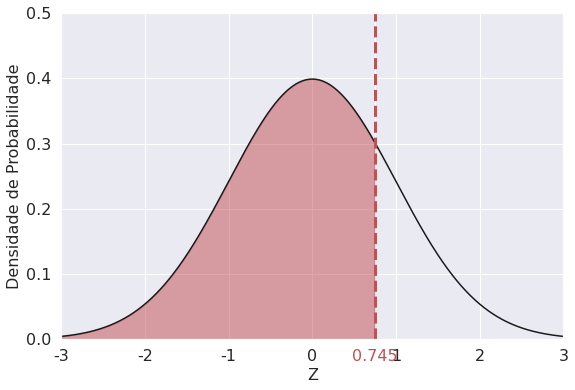

In [9]:
# Gráfico de Distribuição Normal
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.font_manager as font_manager
labelfont = {'fontname':'Trebuchet MS', 'fontsize':'16'}

from matplotlib.ticker import FormatStrFormatter

x = np.linspace(-3,3.01,1000,endpoint=True)
y = stats.norm.pdf(x)

Figure_1, ax = plt.subplots()
Figure_1.set_size_inches(9,6, forward=True)
plt.plot(x, y, color='k',alpha=1)
plt.plot([z_score,z_score], [0,0.5], color='r', linewidth=3, linestyle='--')
plt.xlabel("Z",**labelfont)
plt.xlim([-3,3])
plt.ylabel("Densidade de Probabilidade",**labelfont)
plt.ylim([0,0.5])
plt.yticks(np.arange(0,0.501,0.1),**labelfont) 
plt.xticks(np.arange(-3,3.01,1),**labelfont) 

# Formatando z_score
plt.xticks(list(plt.xticks()[0]) + [z_score])
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
Figure_1.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[-1] = "{:.3f}".format(z_score)
for ii,ticklabel in enumerate(plt.gca().get_xticklabels()):
    if ii==len(labels)-1:
        ticklabel.set_color('r')

ax.set_xticklabels(labels)

#Preenchendo Área
ax.fill_between(x[x<=z_score], y[x<=z_score],color='r',alpha=0.5)

plt.show()

In [10]:
# Gráfico de Sensibilidade - Delta IP x NRMS

NRMS = np.linspace(0,10.01,1000,endpoint=True)

IP_1_Base = 5800*2.8         # Impedância da camada de topo - Anidrita
IP_2_Base = 4400*2.55        # Impedância da camada reservatório - cenário base
Delta_IP_1 = 0               # Variação 4D de Impedância - Camada 1 (%)

# Calculando Z-Score
Delta_IP_Producao_1 = (Delta_IP_1/100)*IP_1_Base
Delta_IP_Original = np.abs(IP_2_Base - IP_1_Base)

z_score_50 = 0.674    # 50% Interval
Delta_IP_2_50 = 100*(NRMS/100)*z_score_50*Delta_IP_Original/IP_2_Base

z_score_80 = 1.282    # 80% Interval
Delta_IP_2_80 = 100*(NRMS/100)*z_score_80*Delta_IP_Original/IP_2_Base

z_score_90 = 1.65     # 90% Interval
Delta_IP_2_90 = 100*(NRMS/100)*z_score_90*Delta_IP_Original/IP_2_Base

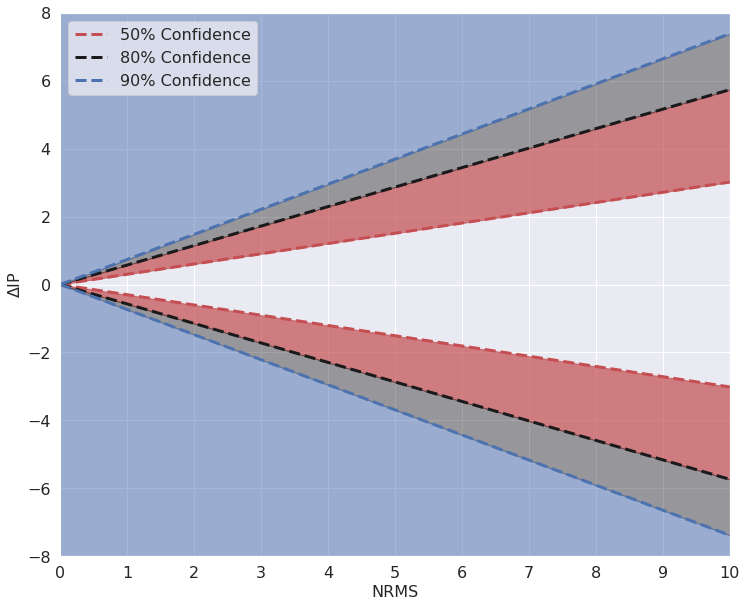

In [11]:
Figure_1, ax = plt.subplots()
Figure_1.set_size_inches(12,10, forward=True)
font_legend = font_manager.FontProperties(family='Trebuchet MS',size=16) 
plt.plot(NRMS, Delta_IP_2_50, color='r',alpha=1, linewidth=3, linestyle='--',label='50% Confidence')
plt.plot(NRMS, -Delta_IP_2_50, color='r',alpha=1, linewidth=3, linestyle='--')
plt.plot(NRMS, Delta_IP_2_80, color='k',alpha=1, linewidth=3, linestyle='--',label='80% Confidence')
plt.plot(NRMS, -Delta_IP_2_80, color='k',alpha=1, linewidth=3, linestyle='--')
plt.plot(NRMS, Delta_IP_2_90, color='b',alpha=1, linewidth=3, linestyle='--',label='90% Confidence')
plt.plot(NRMS, -Delta_IP_2_90, color='b',alpha=1, linewidth=3, linestyle='--')

plt.xlabel("NRMS",**labelfont)
plt.xlim([0,5])
plt.ylabel(r"$\Delta$IP",**labelfont)
plt.ylim([-5,5])
plt.xticks(np.arange(0,10.01,1),**labelfont) 
plt.yticks(np.arange(-8,8.001,2),**labelfont) 
plt.legend(prop=font_legend,loc="upper left") 

ax.fill_between(NRMS, Delta_IP_2_50, Delta_IP_2_80, color='r',alpha=0.7)
ax.fill_between(NRMS, -Delta_IP_2_50, -Delta_IP_2_80, color='r',alpha=0.7)
ax.fill_between(NRMS, Delta_IP_2_80, Delta_IP_2_90, color='k',alpha=0.4)
ax.fill_between(NRMS, -Delta_IP_2_80, -Delta_IP_2_90, color='k',alpha=0.4)
ax.fill_between(NRMS, Delta_IP_2_90, 8 ,color='b',alpha=0.5)
ax.fill_between(NRMS, -Delta_IP_2_90, -8 ,color='b',alpha=0.5)

plt.show()